## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Preprocessing

In [ ]:
# loading the dataset to a pandas dataframe
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.shape

(284807, 31)

In [ ]:
# Sample 6 random values for dataset overview
df.sample(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
119154,75353.0,-0.360269,1.085853,1.275149,0.880752,0.181171,-0.805970,0.756023,-0.202850,-0.587043,...,0.176180,0.505683,-0.163896,0.402967,-0.269060,-0.348155,0.031807,0.177454,4.00,0
283057,171346.0,0.010996,0.651044,0.131359,-0.765418,0.474429,-0.570524,0.763188,0.096833,0.012300,...,-0.245805,-0.656135,0.051903,-0.456269,-0.555923,0.152813,0.232563,0.079292,5.38,0
4288,3757.0,1.435574,-0.466059,0.083088,-0.826208,-0.211566,0.266075,-0.739424,-0.041597,0.629604,...,-0.303267,-0.749541,-0.007715,-1.420562,0.308209,-0.404079,-0.006022,0.000828,24.00,0
117192,74576.0,-0.760835,0.591667,1.644363,-1.281161,0.027924,-0.613812,0.580747,0.079845,-0.052393,...,-0.029118,-0.065481,0.034371,0.122458,-0.394007,0.746688,0.263363,0.175432,29.00,0
245694,152864.0,2.029854,-0.861405,-1.181586,-0.514224,-0.916942,-1.024077,-0.809120,-0.175244,0.087924,...,0.265254,0.716194,0.033558,-0.208982,-0.157553,-0.086881,0.016393,-0.002378,79.98,0
102144,68068.0,-0.538801,1.268105,0.464914,0.538860,0.453642,0.239841,0.505676,0.403760,-1.191407,...,0.203727,0.488578,-0.219090,-0.806624,-0.059644,-0.281775,0.041151,0.084244,35.40,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Distribution of legal transactions and fraud transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This dataset is highly unbalanced

In [ ]:
# Rows where class = 1 assigned as fraud variable
fraud=df[df.Class==1]
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
# Rows where class = 0 assigned as legal variable
legal=df[df.Class==0]
legal.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(legal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# compare values for both transactions
new_df1=df.groupby('Class').mean()
new_df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Under-Sampling

In [ ]:
# Sampling 500 legal class instances comparable to 492 fraud class instances
bal_leg=legal.sample(500)

In [ ]:
bal_leg.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
952,721.0,-3.563311,3.030830,1.018811,-2.435007,-0.050960,-0.897096,1.693126,-1.389859,4.031212,...,-0.838791,-0.214105,-0.095769,0.510644,0.212094,0.466986,-0.272527,-1.107368,1.46,0
97409,66208.0,-0.347740,1.107136,1.290610,0.065768,0.028395,-0.996763,0.684244,-0.059778,-0.362144,...,-0.266218,-0.707566,-0.013868,0.323224,-0.166883,0.072932,0.244333,0.097959,1.79,0
135452,81260.0,-2.938168,1.233004,0.275803,0.374258,-0.059282,1.648502,-1.004376,-3.281966,-0.611900,...,3.438184,-1.728506,0.864570,-0.645079,-0.285975,1.162638,0.321127,-0.173288,90.00,0
94122,64744.0,-0.596371,0.430619,2.321634,0.877901,0.712018,0.669939,0.017011,-0.009585,-0.006033,...,0.083405,0.549939,-0.533062,-0.941700,0.517166,-0.023780,-0.032017,-0.134330,1.00,0
40787,40398.0,1.169878,0.248748,0.569484,1.053890,-0.468048,-0.702333,-0.017155,-0.028662,-0.147496,...,0.007478,-0.017066,-0.003865,0.504075,0.467521,-0.467219,0.015352,0.016919,6.95,0


In [ ]:
# concatenating two dataframes
new = pd.concat([bal_leg, fraud], axis=0)
new.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42856,41273.0,-11.682215,6.332882,-13.297109,7.690772,-10.889891,-2.792360,-12.561783,7.287122,-7.570322,...,2.133456,-1.271509,-0.035304,0.615054,0.349024,-0.428923,-0.694935,-0.818970,173.07,1
70507,53898.0,1.502104,-1.205304,-0.088778,-1.740555,-0.880822,0.397193,-1.207984,0.192590,-1.802328,...,-0.225102,-0.337003,-0.080204,-1.212740,0.386859,-0.117206,0.030118,-0.006578,20.00,0
172172,120987.0,2.035698,-0.060562,-1.853927,0.256825,0.444161,-0.428091,-0.038465,0.032583,0.534086,...,-0.348691,-1.042728,0.305762,0.135490,-0.314418,0.177875,-0.080566,-0.046176,9.99,0
81186,58822.0,-4.384221,3.264665,-3.077158,3.403594,-1.938075,-1.221081,-3.310317,-1.111975,-1.977593,...,2.076383,-0.990303,-0.330358,0.158378,0.006351,-0.493860,-1.537652,-0.994022,45.64,1
154719,102671.0,-4.991758,5.213340,-9.111326,8.431986,-3.435516,-1.827565,-7.114303,3.431207,-3.875643,...,1.189423,0.247858,0.294448,-0.548504,-0.174617,0.406703,-0.402339,-0.882886,0.00,1


In [ ]:
new["Class"].value_counts()

0    500
1    492
Name: Class, dtype: int64

<Axes: >

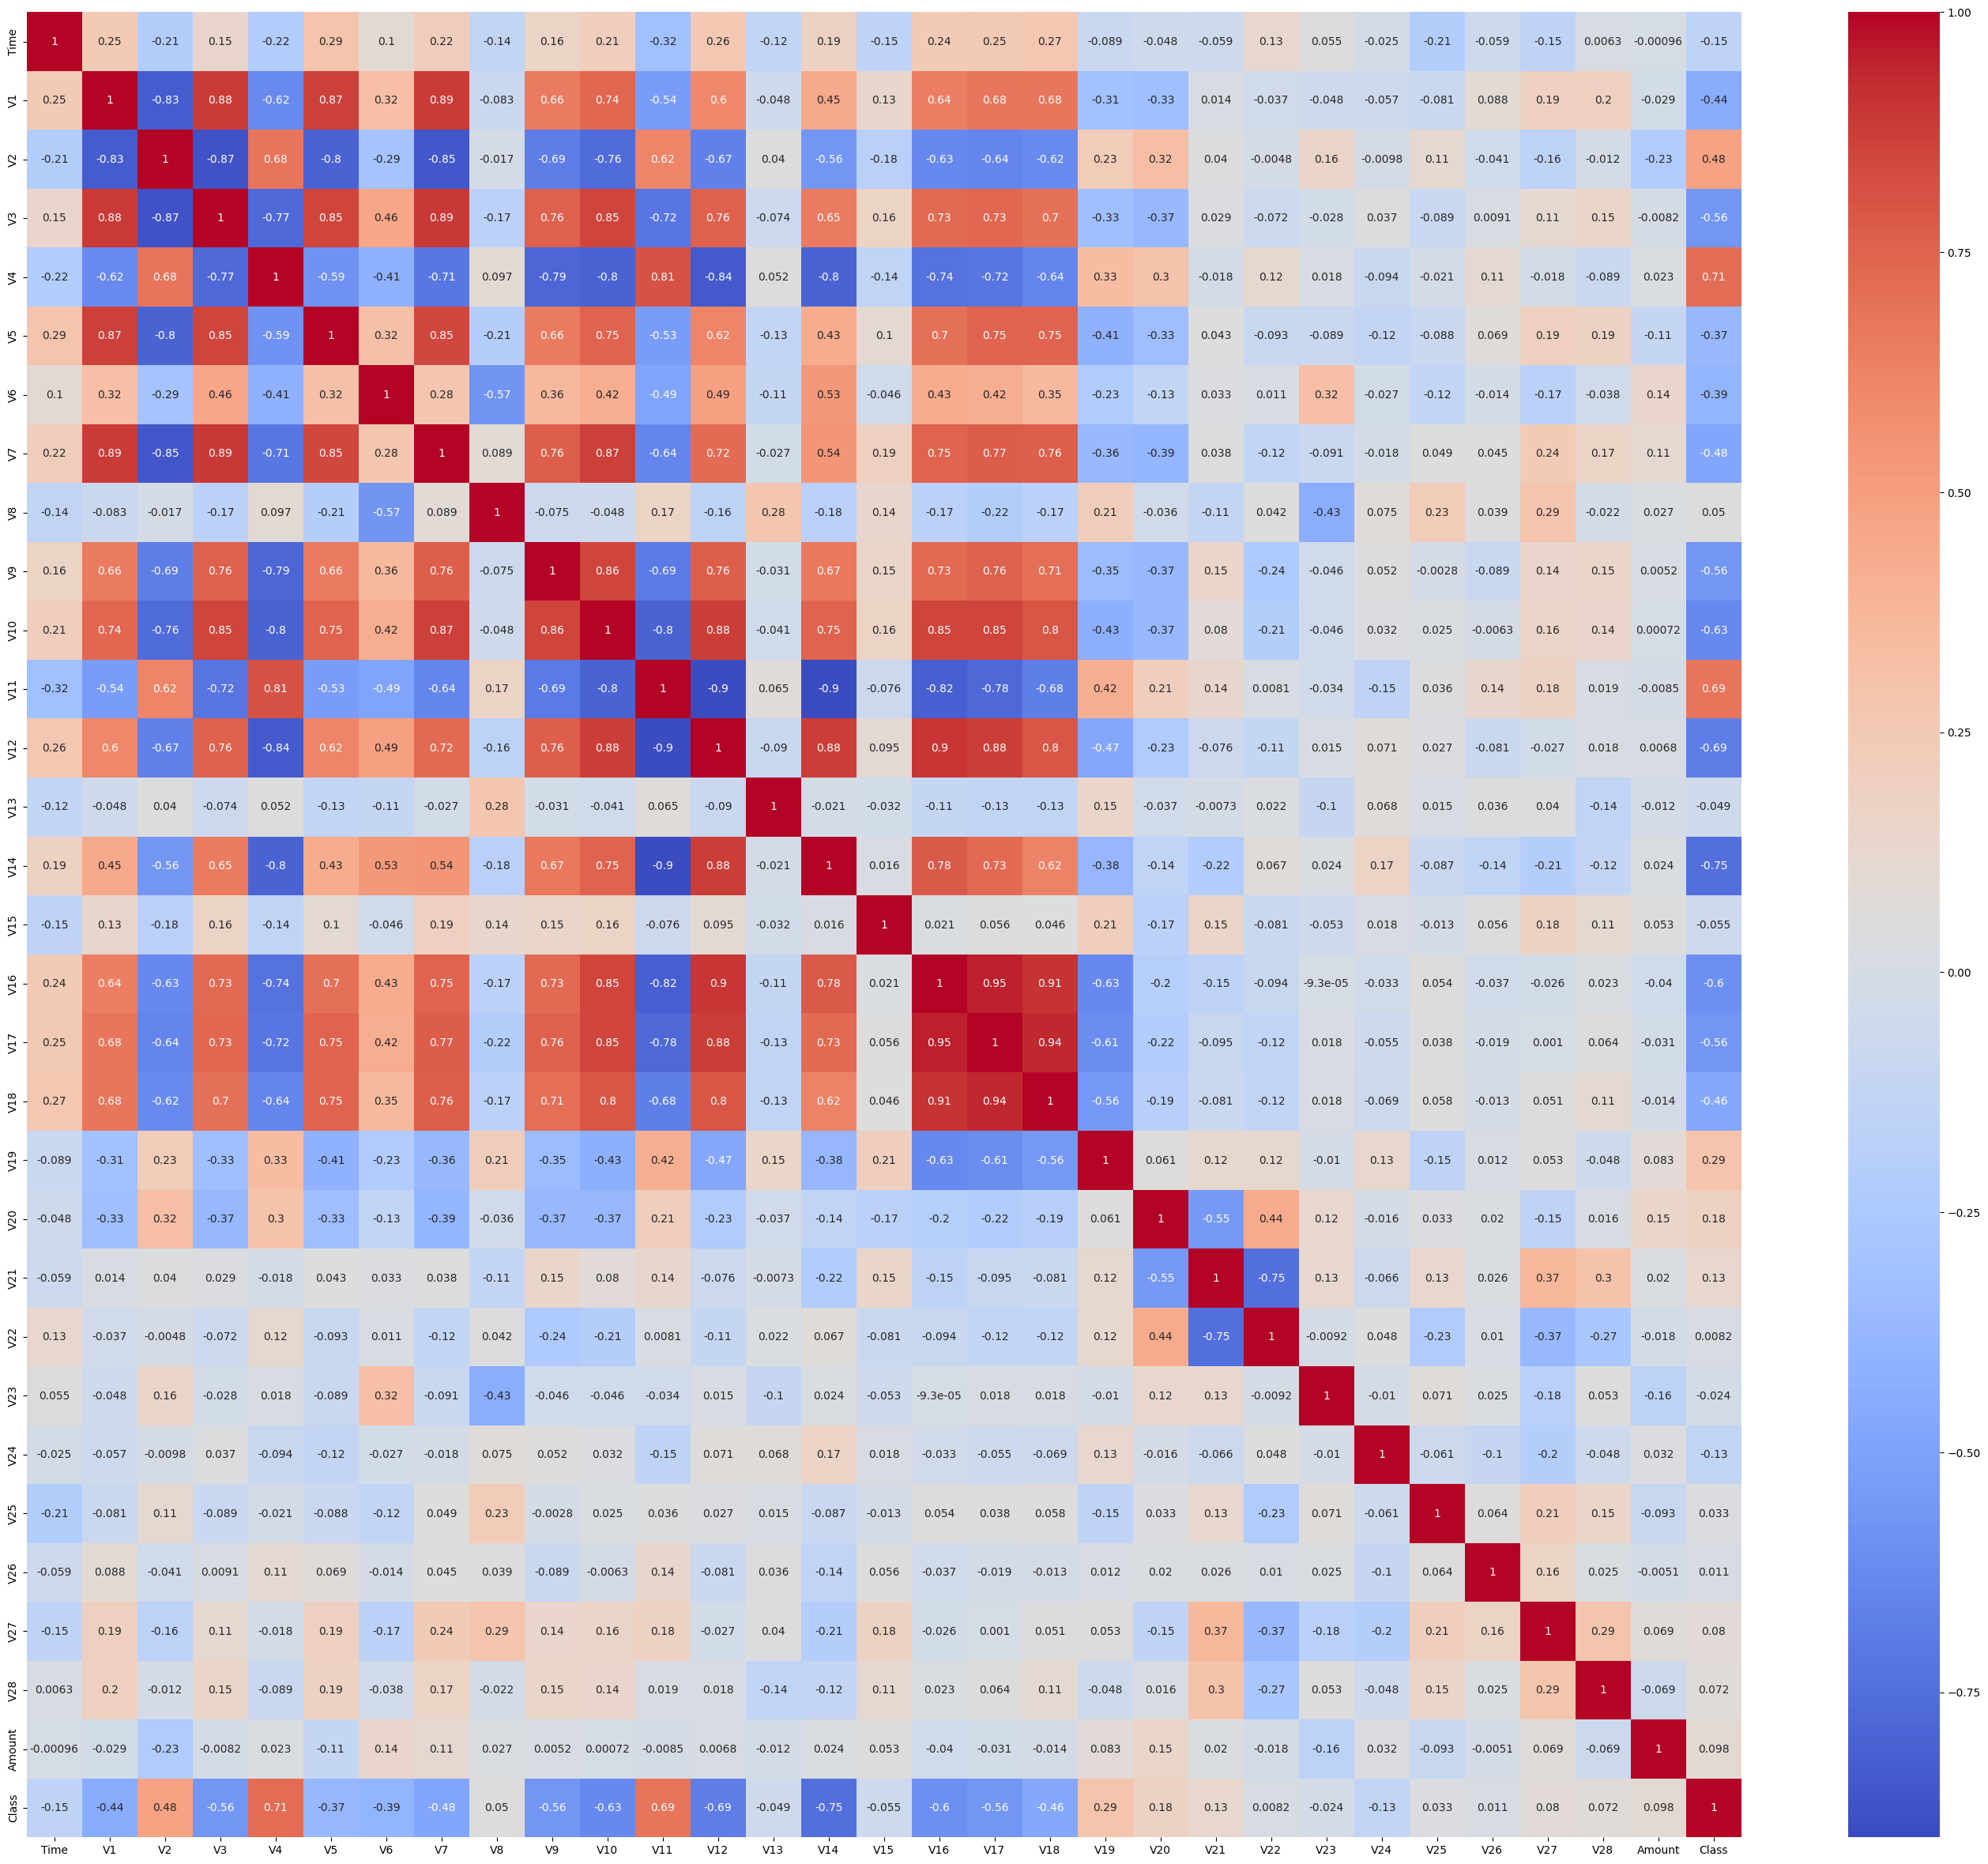

In [ ]:
plt.figure(figsize=(35, 30))
sns.heatmap(new.corr(),cmap='coolwarm',annot=True)
# Heatmap suggests positive covariance between V4 and Class, V11 and Class; and negative covariance between V14 and Class

<Axes: xlabel='V3', ylabel='V7'>

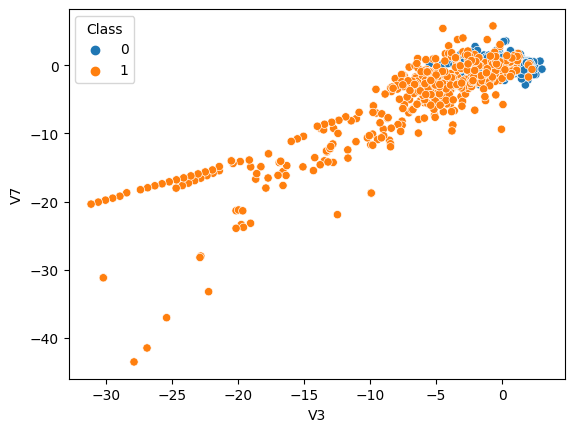

In [ ]:
sns.scatterplot(x='V3',y='V7',data=new,hue='Class')

In [ ]:
new_mean = new.groupby('Class').mean()
new_mean

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94625.246000,0.085185,0.126645,-0.054289,-0.015458,-0.046246,-0.048763,-0.006144,0.082710,0.026313,...,0.005381,0.005904,-0.004983,0.014325,0.047499,-0.002624,0.040711,0.010606,0.016016,78.458160
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
# Checking to see if there is any pattern in their median
df.groupby('Class').median()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,84711.0,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.00
1,75568.5,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.25


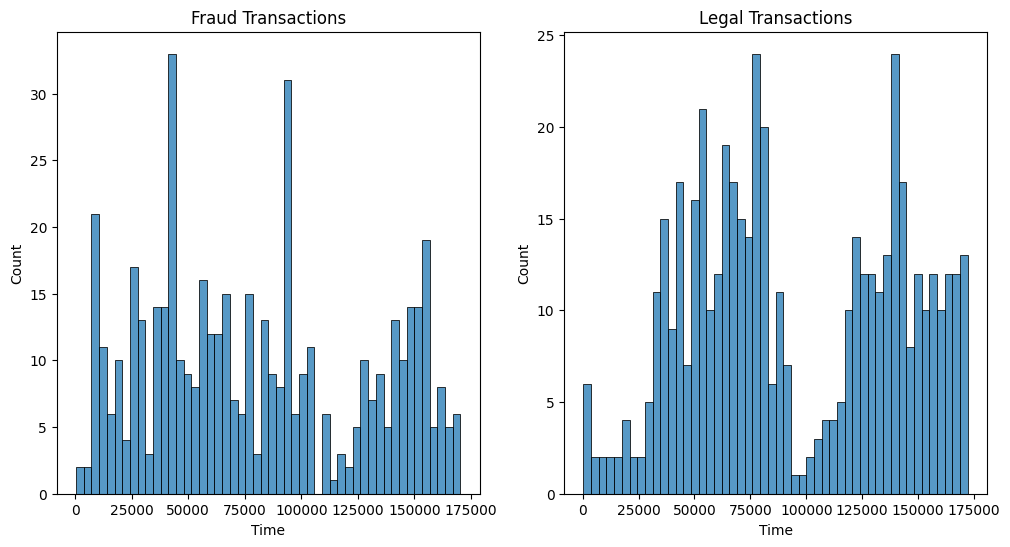

In [ ]:
# Plotting histograms of Fraud Transaction and Legal transaction with time

fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.histplot(new["Time"][new.Class == 1], bins=50, ax=axs[0])
axs[0].set_title("Fraud Transactions")

sns.histplot(new["Time"][new.Class == 0], bins=50, ax=axs[1])
axs[1].set_title("Legal Transactions")

plt.show()

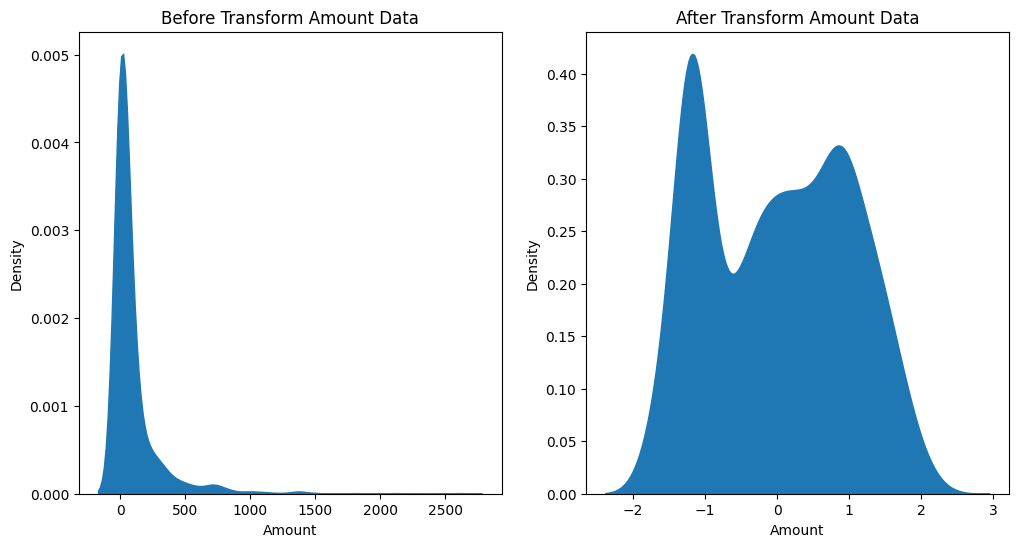

In [ ]:
# to get an idea of the underlying probability distribution of a dataset and to see how the data is spread out
from sklearn.preprocessing import power_transform

fig, axs = plt.subplots(ncols=2, figsize=(12,6))
 # Create a KDE (Kernel Density Estimation) plot of the "Amount" column in the dataframe
sns.kdeplot(x=new["Amount"], fill=True, alpha=1,ax=axs[0])
axs[0].set_title('Before Transform Amount Data')


new["Amount"] = power_transform(new[["Amount"]])
sns.kdeplot(x=new["Amount"], fill=True,alpha=1,ax=axs[1])
axs[1].set_title('After Transform Amount Data')

plt.show()

<Axes: xlabel='Class', ylabel='V7'>

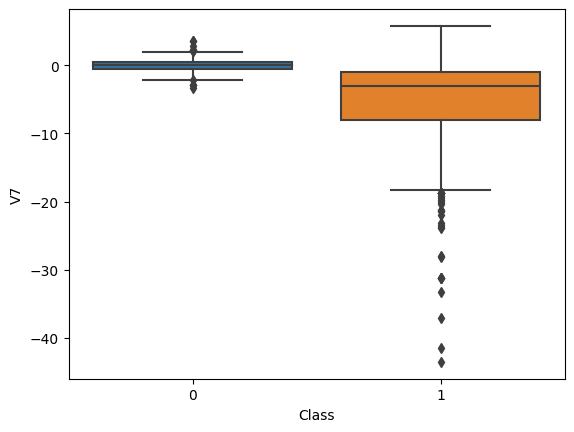

In [ ]:
sns.boxplot(x='Class', y='V7', data=new)

## Splitting Data into features and targets

In [ ]:
X=new.iloc[:,:-1]
y=new.iloc[:,-1]

## Split data into Train, Validation and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 15,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.125,random_state=15,stratify=y_train)
# The ratio of the data in the train, validation, and test sets is 70%, 10%, and 20% respectively

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(693, 30)
(100, 30)
(199, 30)


## Standardizing Data with StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Fit scaler to the training set to calculate the mean and standard deviation of each feature in the set
# Standardize the data in all the sets using the same mean and standard deviation calculated from the training set

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val= scaler.transform(X_val)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = LogisticRegression()

# Define the hyperparameters to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10],
}

# Initialize a grid search object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the predictions for the validation set using the best model
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Compute the accuracy of the best model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)

# Get the predictions for the test set using the best model
y_test_pred = best_model.predict(X_test)

Best hyperparameters: {'C': 1}
Validation accuracy: 0.95


## Cross-Validation with StratifiedKFold

Cross-validation scores: [0.9  0.85 1.   0.8  0.85]
Mean score: 0.8799999999999999
Standard deviation: 0.06782329983125268


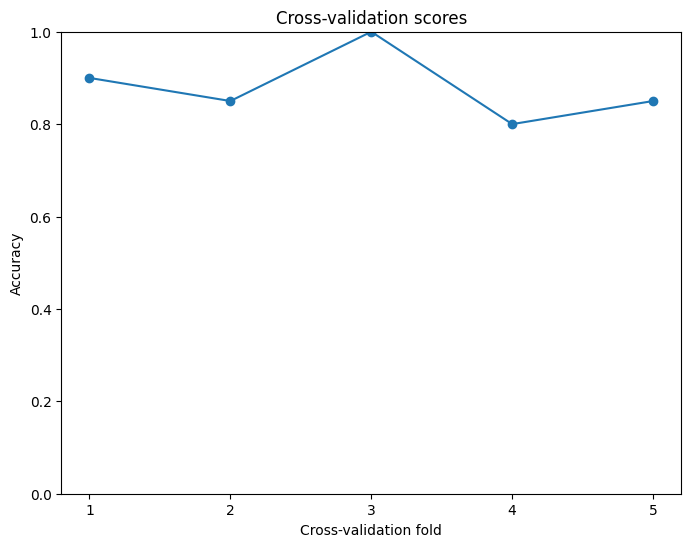

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# best_lr = LogisticRegression(C=0.1, penalty='l2')
# Define the cross-validation method using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_model, X_val, y_val, cv=cv)   # Evaluate the performance of the best model using cross-validation
print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())
print('Standard deviation:', scores.std())

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o')
plt.xlabel('Cross-validation fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation scores')
plt.ylim(0, 1)
plt.xticks(range(1, len(scores) + 1))
plt.show()

In [ ]:
# Compute the accuracy of the best model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.949748743718593


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {'max_depth': [1, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)

best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy on test set:', accuracy)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy on test set: 0.9195979899497487


## Evaluate the performance of the model with cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_tree, X_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', mean_cv_score)
print('Standard deviation of cross-validation scores:', std_cv_score)


Cross-validation scores: [0.91366906 0.91366906 0.92086331 0.89855072 0.93478261]
Mean cross-validation score: 0.9163069544364507
Standard deviation of cross-validation scores: 0.011758493025113188


## Plotting decision tree

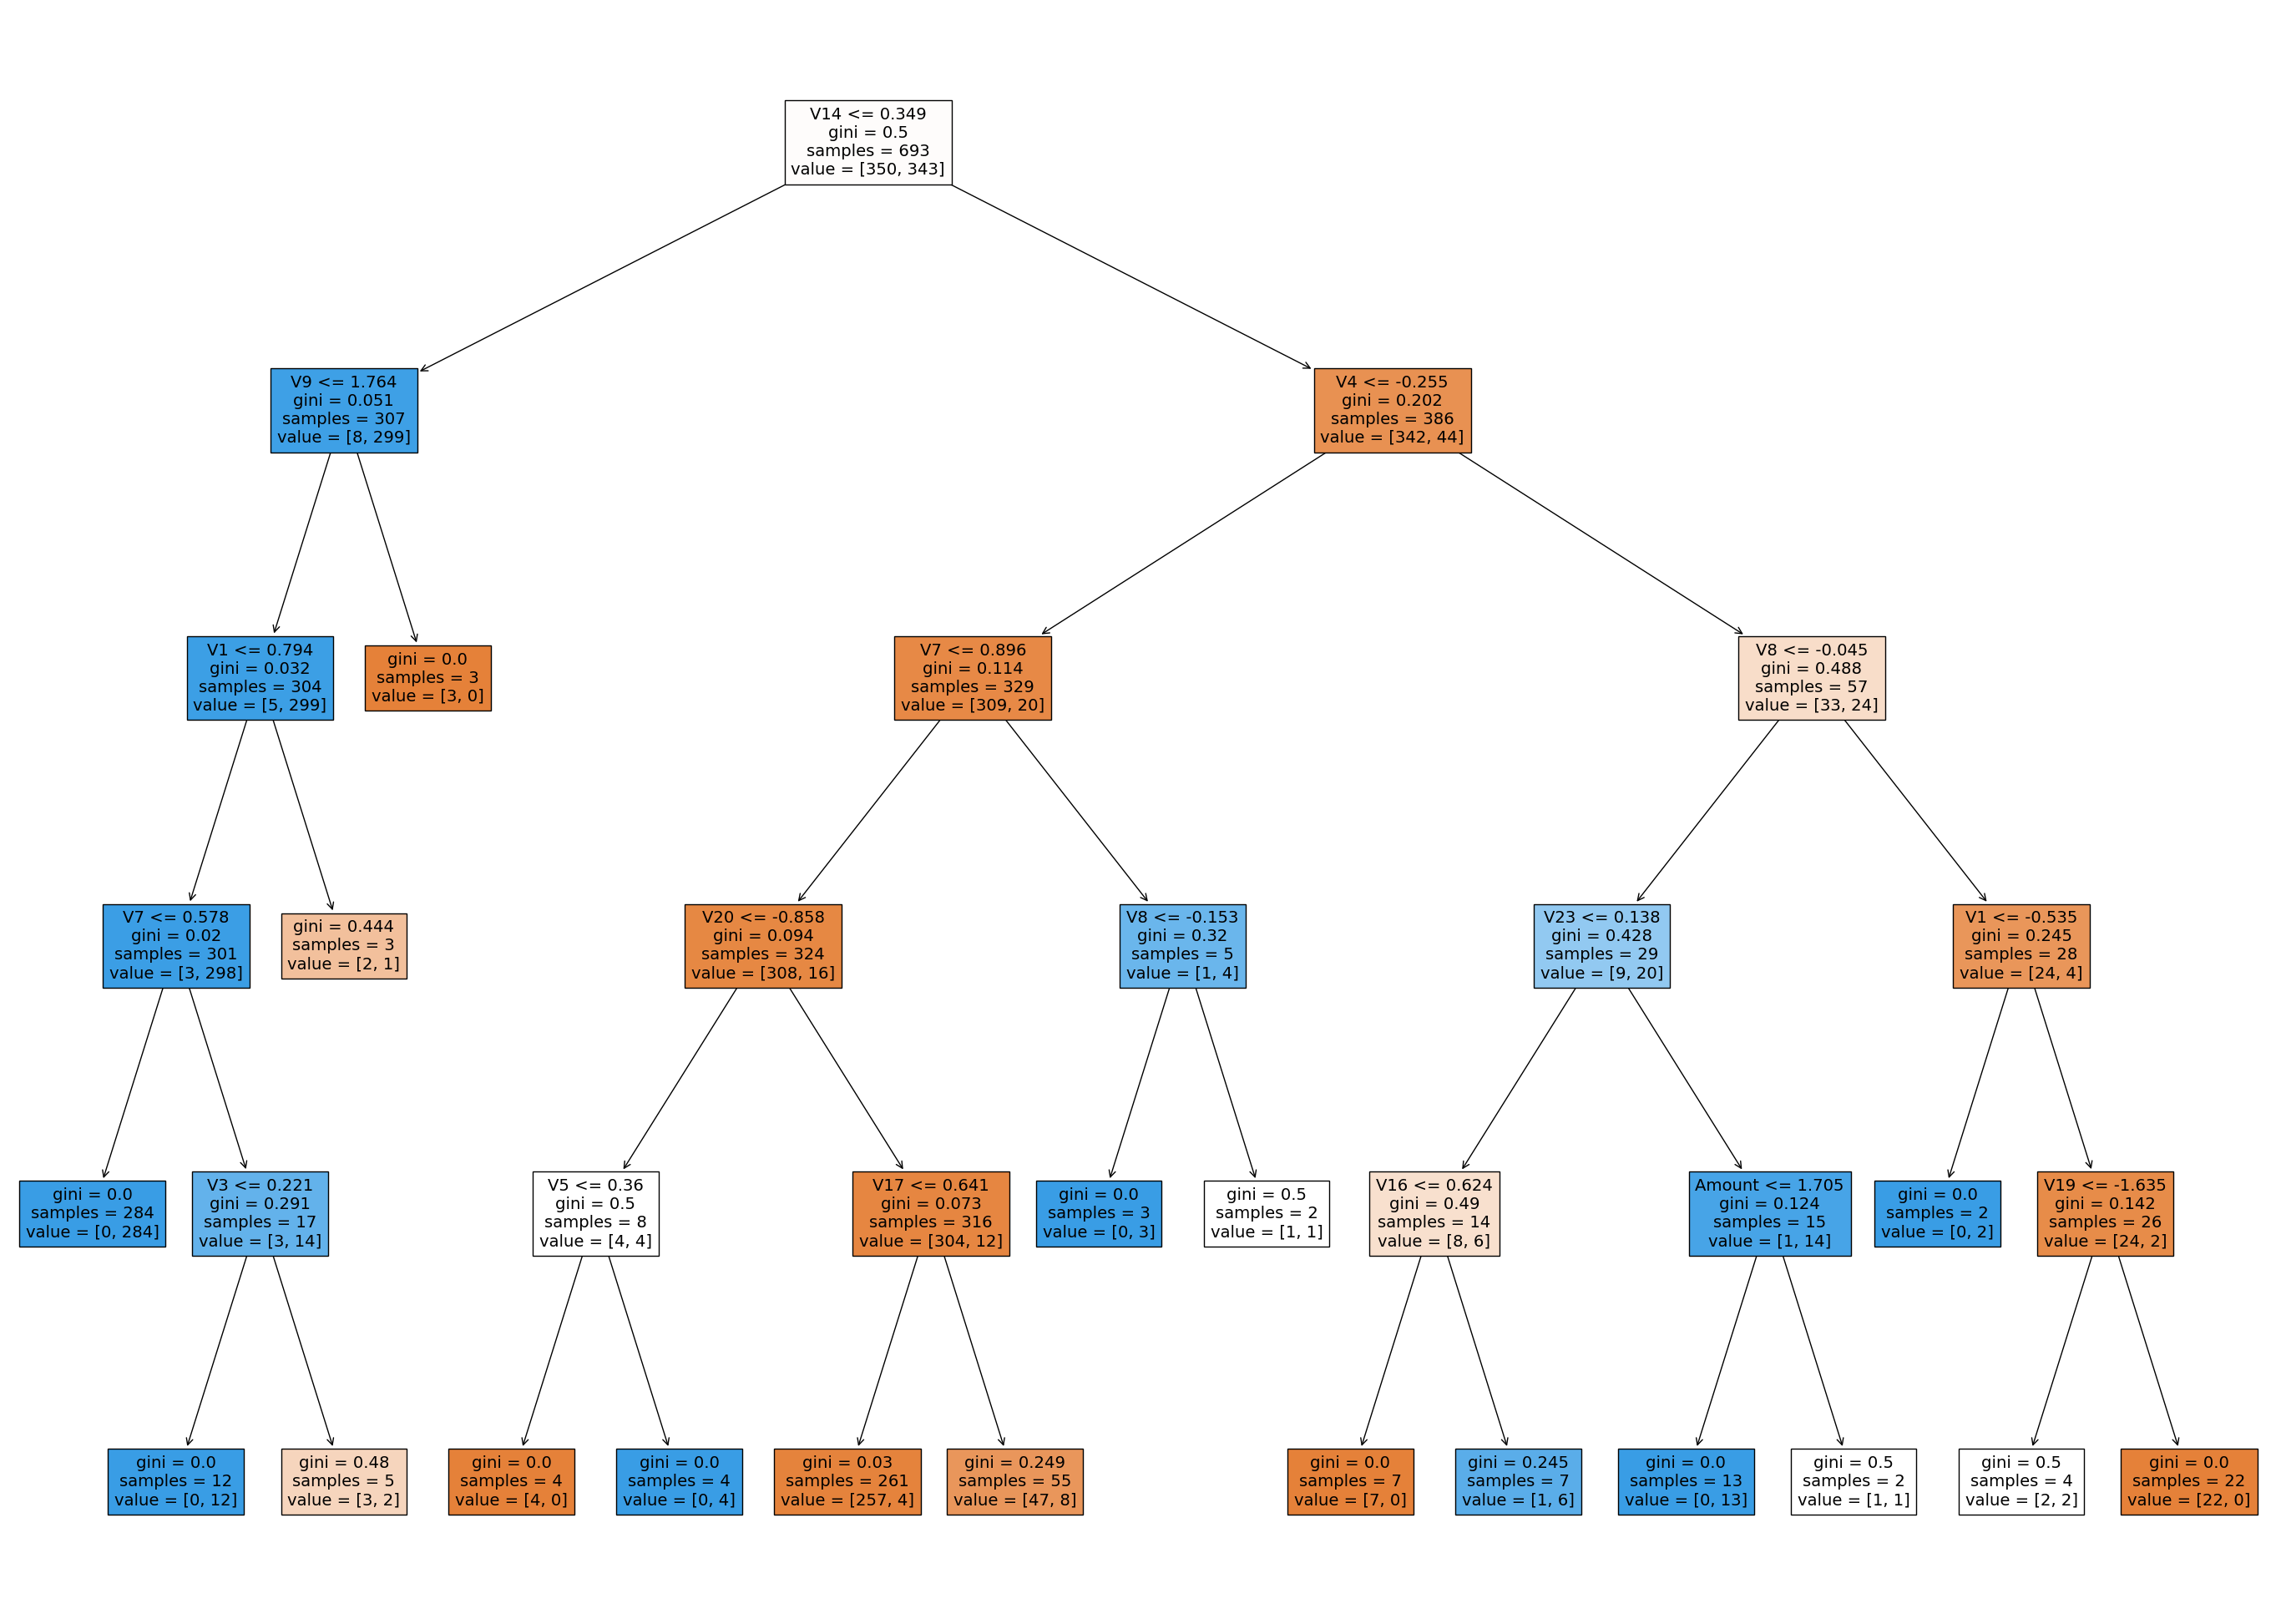

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(35,25))
plot_tree(best_tree, feature_names=X.columns, filled=True)
plt.show()


## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5)    # Define the grid search object with 5-fold cross-validation
grid_search.fit(X_train, y_train)   # Fit the grid search object to the training data

print('Best hyperparameters:', grid_search.best_params_)

from sklearn.metrics import accuracy_score

# Evaluate the performance of the best estimator on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy on test set:', accuracy)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy on test set: 0.9447236180904522


## Evaluate the performance of the model with cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', mean_cv_score)
print('Standard deviation of cross-validation scores:', std_cv_score)

Cross-validation scores: [0.9352518  0.92805755 0.91366906 0.92753623 0.92753623]
Mean cross-validation score: 0.9264101762068606
Standard deviation of cross-validation scores: 0.007010849638742378


## Naive Bayes

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
}

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform grid search cross-validation to find the best hyperparameters
clf = GridSearchCV(gnb, param_grid, cv=5)
clf.fit(X_train, y_train)

best_var_smoothing = clf.best_params_['var_smoothing']
print("Best var_smoothing:", best_var_smoothing)

# Train a Gaussian Naive Bayes classifier with the best hyperparameters
gnb_best = GaussianNB(var_smoothing=best_var_smoothing)
gnb_best.fit(X_train, y_train)

# Evaluate the performance on the test set
y_pred = gnb_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Perform cross-validation on the best model and report the mean and standard deviation of the accuracy
scores = cross_val_score(gnb_best, X_train, y_train, cv=5)
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Best var_smoothing: 1e-09
Accuracy on test set: 0.9095477386934674
Cross-validation accuracy: 0.90 (+/- 0.01)


## Xg Boost

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01],
              'subsample': [0.8, 1.0],
              'colsample_bytree': [0.8, 1.0]}

xgb = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_val, y_val)

print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

val_score = cross_val_score(best_xgb, X_val, y_val, cv=5, scoring='accuracy')
print("Validation accuracy:", val_score.mean())

Validation accuracy: 0.9400000000000001


In [ ]:
test_score = best_xgb.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9447236180904522


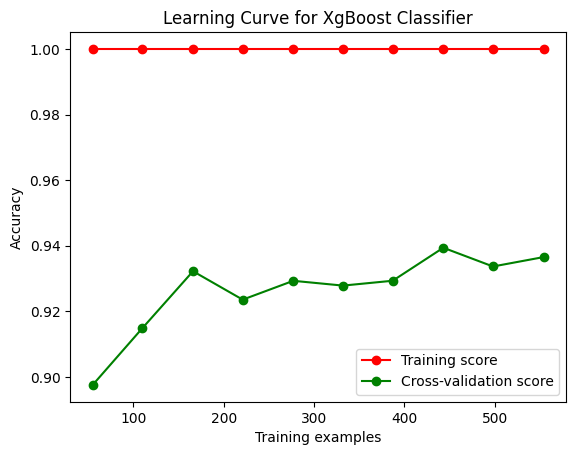

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# define XgBoost Classifier
# xgb_clf = xgb.XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0)

# plot learning curve
train_sizes, train_scores, valid_scores = learning_curve(xgb, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for XgBoost Classifier")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


## PCA

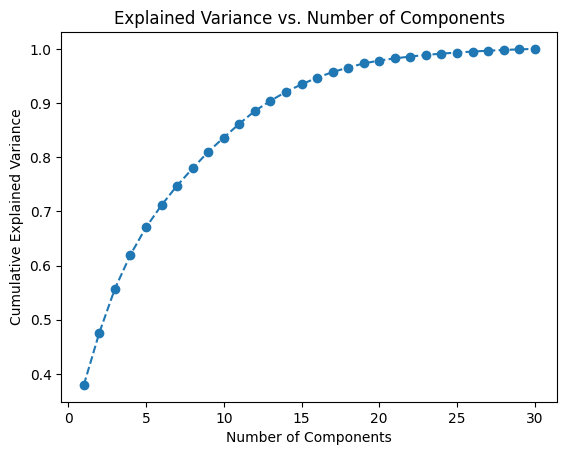


n = 13


In [ ]:
from sklearn.decomposition import PCA

# Instantiate the PCA class with all features
pca = PCA(n_components=30)

# Fit the PCA model to the training data
pca.fit(X_train)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a plot of the cumulative explained variance
plt.plot(range(1, 31), cumulative_variance, marker='o', linestyle='--')

# Add labels and title to the plot
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
# Show the plot
plt.show()

# number of principal components required for > 90% variance in the data
for i in range(len(cumulative_variance)):
    if (cumulative_variance[i]>=0.9):
        n=i+1
        break
print()
print("n =", n)

In [ ]:
pca = PCA(n_components=n)

# Fit the PCA model to the training data
pca.fit(X_train)

X_train_transformed=pca.transform(X_train)
X_val_transformed=pca.transform(X_val)
X_test_transformed=pca.transform(X_test)

best_xgb.fit(X_train_transformed, y_train)

val_score = cross_val_score(best_xgb, X_val, y_val, cv=5, scoring='accuracy')
print("Validation accuracy:", val_score.mean())

test_score = best_xgb.score(X_test_transformed, y_test)
print("Test accuracy:", test_score)

Validation accuracy: 0.9400000000000001
Test accuracy: 0.9246231155778895


In [ ]:
gnb_best.fit(X_train_transformed, y_train)

y_pred = gnb_best.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

scores = cross_val_score(gnb_best, X_train_transformed, y_train, cv=5)
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy on test set: 0.9195979899497487
Cross-validation accuracy: 0.90 (+/- 0.02)


## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate the LDA class
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Transform the training, testing, and validation data using the trained LDA model
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)
X_val_lda = lda.transform(X_val)

y_pred = lda.predict(X_test)
print("Test Accuracy of LDA:", accuracy_score(y_test, y_pred))

y_pred1 = lda.predict(X_val)
print("Val Accuracy of LDA:", accuracy_score(y_val, y_pred1))


from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression class
lr = LogisticRegression()

# Fit the logistic regression model to the training data
lr.fit(X_train_lda, y_train)

# Predict the target variable for the testing and validation data
y_pred_test = lr.predict(X_test_lda)
y_pred_val = lr.predict(X_val_lda)

# Calculate the accuracy of the model on the testing and validation data
acc_test = accuracy_score(y_test, y_pred_test)
acc_val = accuracy_score(y_val, y_pred_val)

print(f'Testing Accuracy of LR: {acc_test:.2f}')
print(f'Validation Accuracy of Lr: {acc_val:.2f}')


Test Accuracy of LDA: 0.9095477386934674
Val Accuracy of LDA: 0.9
Testing Accuracy of LR: 0.90
Validation Accuracy of Lr: 0.87


In [ ]:
# Creating the decision tree classifier object
clf_lda = DecisionTreeClassifier(max_depth=5)

# Fitting the classifier to the training data
clf_lda.fit(X_train_lda, y_train)

# Predicting the class labels for the test data
y_pred = clf_lda.predict(X_test_lda)
y_pred_val=clf_lda.predict(X_val_lda)
# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy_val=accuracy_score(y_val,y_pred_val)

print("Accuracy of test decision tree after LDA:", accuracy)
print("Accuracy of val decision tree after LDA:", accuracy)

Accuracy of test decision tree after LDA: 0.914572864321608
Accuracy of val decision tree after LDA: 0.914572864321608


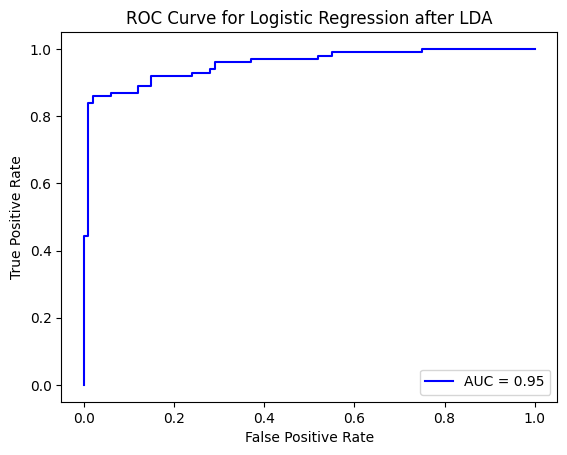

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# get probabilities of positive class
probs = lr.predict_proba(X_test_lda)[:,1]

# compute fpr and tpr
fpr, tpr, threshold = roc_curve(y_test, probs)

# compute area under curve
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('ROC Curve for Logistic Regression after LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()


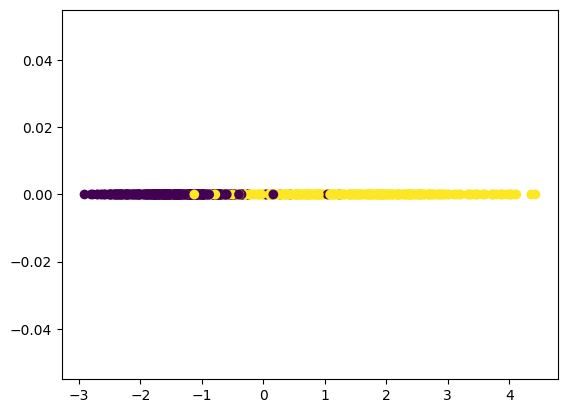

In [ ]:
c = [0] * len(X_train_lda)
plt.scatter(X_train_lda,c, c=y_train, marker='o')
plt.show()


## SVM classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_model = SVC(kernel='linear')
scores = cross_val_score(svm_model, X_train, y_train, cv=5)

svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy of SVM:",accuracy)



print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Accuracy of SVM: 0.949748743718593
Cross-validation scores: [0.92086331 0.94964029 0.94244604 0.93478261 0.93478261]
Average cross-validation score: 0.94


Confusion matrix:
 [[99  1]
 [ 9 90]]


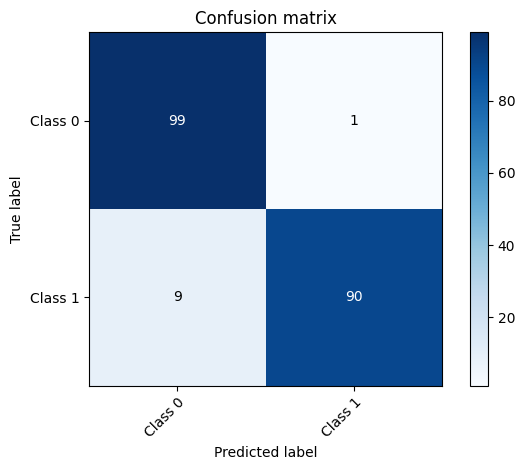

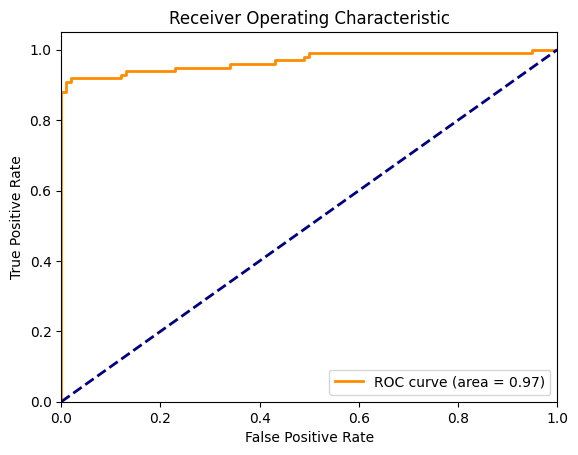

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'],
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

y_scores = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Artificial Neural Network

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [ ]:
model=Sequential()
model.add(Dense(10,activation="sigmoid",input_dim=30))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                310       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy",optimizer=optimizer)


In [ ]:
model.fit(X_train,y_train,epochs=50,verbose=1,batch_size=1)

Epoch 1/50
693/693 [==============================] - 4s 4ms/step - loss: 0.5032
Epoch 2/50
693/693 [==============================] - 2s 3ms/step - loss: 0.3194
Epoch 3/50
693/693 [==============================] - 1s 2ms/step - loss: 0.2600
Epoch 4/50
693/693 [==============================] - 1s 2ms/step - loss: 0.2256
Epoch 5/50
693/693 [==============================] - 1s 2ms/step - loss: 0.2017
Epoch 6/50
693/693 [==============================] - 1s 2ms/step - loss: 0.1846
Epoch 7/50
693/693 [==============================] - 1s 2ms/step - loss: 0.1693
Epoch 8/50
693/693 [==============================] - 1s 2ms/step - loss: 0.1624
Epoch 9/50
693/693 [==============================] - 1s 2ms/step - loss: 0.1549
Epoch 10/50
693/693 [==============================] - 1s 2ms/step - loss: 0.1494
Epoch 11/50
693/693 [==============================] - 2s 2ms/step - loss: 0.1451
Epoch 12/50
693/693 [==============================] - 2s 2ms/step - loss: 0.1412
Epoch 13/50
693/693 [====

In [ ]:
y_pred=[np.round(i) for i in model.predict(X_test)]
cnt=0
for i in range(len(y_pred)):
  if(y_pred[i]==y_test.values[i]):
    cnt+=1
print(cnt/len(y_pred))

7/7 [==============================] - 0s 2ms/step
0.9547738693467337
